In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h5py
from sklearn import preprocessing, neighbors, svm
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import truncnorm
from scipy.optimize import curve_fit

In [9]:
df= pd.read_csv('rechit_features_with_target.csv')

In [10]:
df

,z_13.877,z_14.767,z_16.782,z_17.673,z_19.688,z_20.577,z_22.692,z_23.583,z_25.698,z_26.587,...,z_40.812,z_42.908,z_44.037,z_46.412,z_47.542,z_49.682,z_50.688,z_52.882,z_53.903,target_energy
0,29.806881,116.785048,551.959116,867.931910,1394.833763,1434.385677,1998.590474,2083.453882,2828.288451,2199.648372,...,497.814870,256.368887,182.391306,186.197554,61.646809,67.852255,44.622586,51.546187,46.679465,286.606530
1,60.289388,154.114308,418.088728,486.282714,946.419755,1352.768847,1961.278227,2068.751030,2432.984322,2092.910957,...,421.916583,323.743953,210.630496,203.693311,123.281299,49.468950,39.322538,31.082570,20.599729,260.230767
2,40.690735,158.744283,338.596367,461.740181,868.336614,931.791397,1128.276636,1104.793859,1284.334015,943.772482,...,101.399082,99.899248,91.408694,23.178453,19.083310,9.753450,24.565086,11.780640,16.806829,122.320895
3,21.497051,68.508469,193.359974,313.235154,513.012143,529.425181,639.027889,543.335632,663.683877,518.215865,...,46.191601,14.113176,25.388305,22.635209,7.608829,10.633342,3.351710,2.195675,0.000000,64.871587
4,13.897627,23.198348,118.975507,278.665998,637.436678,810.794351,1246.932690,1321.134160,1475.480909,1817.616275,...,487.501248,395.509902,259.609416,226.192093,111.999611,97.001058,50.812943,97.485511,28.143846,237.140564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648272,21.250164,66.838691,177.493397,388.992064,643.205066,719.002502,1125.290638,1205.034358,1552.958398,1541.481055,...,313.904695,192.288526,158.421528,70.996727,58.938239,49.481947,59.140531,51.680771,11.305082,165.843731
648273,14.053285,32.485989,102.391924,138.993674,185.672343,184.265892,332.451968,160.916810,128.273477,133.675000,...,6.162532,0.837810,0.000000,0.000000,2.640859,8.610673,0.000000,0.000000,1.834906,16.499020
648274,53.482277,111.901147,212.928856,386.965841,766.975925,1283.334805,1935.399827,2219.122831,3180.199488,3329.503437,...,569.166779,442.581341,293.049228,232.959118,172.176146,107.924580,72.147548,44.257139,22.483658,332.820497
648275,17.868074,62.976410,180.036973,398.908666,639.901752,723.700798,1210.240215,1326.781743,1796.882545,1591.109492,...,213.818367,189.445325,179.892219,122.612417,38.933928,23.759661,24.527891,24.323962,1.363646,185.578445


In [11]:
X = df.drop(['target_energy'], axis=1)
y = df['target_energy']

In [12]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Split temp into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)


In [13]:
# xgbr = XGBRegressor(
#     objective='reg:squarederror',  # recommended for regression
#     n_estimators=300,
#     learning_rate=0.1,
#     max_depth=10
# )
# !pip install -U xgboost

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# Example data
# X = your input features (shape: [n_samples, n_features])
# y = your target (shape: [n_samples])
# Replace below with your real data
# X, y = ...

# Split data
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize model
# xgbr = XGBRegressor(
#     objective='reg:squarederror',
#     n_estimators=300,
#     learning_rate=0.1,
#     max_depth=10,
#     eval_metric='rmse'
# )

# # Train with evaluation
# evals_result = {}  # store training history
# xgbr.fit(
#     X_train, y_train,
#     eval_set=[(X_train, y_train), (X_val, y_val)],
#     eval_metric='rmse',
#     early_stopping_rounds=10,
#     verbose=False,
#     callbacks=[],
#     evals_result=evals_result
# )

# from xgboost import XGBRegressor

# xgb = XGBRegressor(
#     objective='reg:squarederror',
#     n_estimators=300,
#     learning_rate=0.1,
#     max_depth=10
# )

# xgb.fit(
#     X_train, y_train,
#     eval_set=[(X_test, y_test)],
#     eval_metric='rmse',
#     early_stopping_rounds=10,
#     verbose=True
# )


# # Plot learning curves
# epochs = len(evals_result['validation_0']['rmse'])
# x_axis = range(0, epochs)

# plt.figure(figsize=(8, 6))
# plt.plot(x_axis, evals_result['validation_0']['rmse'], label='Train')
# plt.plot(x_axis, evals_result['validation_1']['rmse'], label='Validation')
# plt.legend()
# plt.xlabel('Epoch')
# plt.ylabel('RMSE')
# plt.title('XGBoost RMSE over Epochs')
# plt.grid(True)
# plt.tight_layout()
# plt.show()


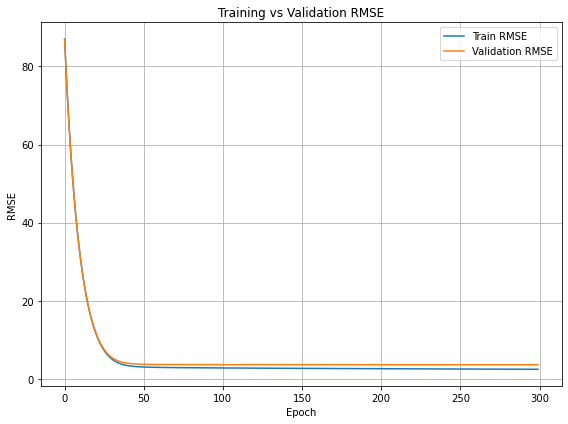

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.datasets import make_regression

# # Dummy data — replace with your actual data
# X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the model without eval_metric
xgb = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=300,
    learning_rate=0.1,
    max_depth=10
)

# Fit with eval_set (this still tracks loss)
xgb.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    verbose=False  # disables training printout
)

# Get eval history from model
evals_result = xgb.evals_result()

# Plot learning curves
train_rmse = evals_result['validation_0']['rmse']
val_rmse = evals_result['validation_1']['rmse']
epochs = range(len(train_rmse))

plt.figure(figsize=(8, 6))
plt.plot(epochs, train_rmse, label='Train RMSE')
plt.plot(epochs, val_rmse, label='Validation RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('Training vs Validation RMSE')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
# import xgboost as xgb
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error

# # -------------------------------------------
# # Load your dataset
# # Replace this with your actual data
# # X: (n_samples, n_features), y: (n_samples,)
# # X = np.load("X_data.npy")           # or use pd.read_csv().values
# # y = np.load("target_energy.npy")    # Your target array

# # # -------------------------------------------
# # # Split into training and validation
# # X_train, X_val, y_train, y_val = train_test_split(
# #     X, y, test_size=0.2, random_state=42
# # )

# # Create DMatrix for training and validation
# dtrain = xgb.DMatrix(X_train, label=y_train)
# dval = xgb.DMatrix(X_val, label=y_val)

# # -------------------------------------------
# # Define parameters
# params = {
#     "objective": "reg:squarederror",
#     "eval_metric": "rmse",
#     "max_depth": 20,
#     "eta": 0.1,                      # learning rate
#     "verbosity": 1
# }

# # -------------------------------------------
# # Train with early stopping
# evals_result = {}  # Store evaluation results
# bst = xgb.train(
#     params,
#     dtrain,
#     num_boost_round=300,
#     evals=[(dtrain, "train"), (dval, "eval")],
#     early_stopping_rounds=10,
#     evals_result=evals_result,
#     verbose_eval=True
# )

# # -------------------------------------------
# # Plot training and validation curves
# train_rmse = evals_result["train"]["rmse"]
# val_rmse = evals_result["eval"]["rmse"]
# epochs = range(1, len(train_rmse) + 1)

# plt.figure(figsize=(8, 5))
# plt.plot(epochs, train_rmse, label="Training RMSE")
# plt.plot(epochs, val_rmse, label="Validation RMSE")
# plt.axvline(bst.best_iteration, color='r', linestyle='--', label='Early Stop Point')
# plt.xlabel("Boosting Round")
# plt.ylabel("RMSE")
# plt.legend()
# plt.title("Training vs Validation RMSE")
# plt.grid(True)
# plt.tight_layout()
# plt.savefig("xgboost_training_curve.png")
# plt.show()

# # -------------------------------------------
# # Save model if needed
# bst.save_model("xgboost_model.json")


In [ ]:
# xgbr.fit(X_train, y_train, eval_set=[(X_val,y_val)], verbose= True)

In [17]:
from sklearn.model_selection import cross_val_score, KFold

scores = cross_val_score(xgb, X_train, y_train)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 1.00


In [18]:
test_score = xgb.score(X_test, y_test)  # Accuracy by default
print("Test score: %.2f" % test_score)

Test score: 1.00


In [19]:
y_test_np = y_test.values if hasattr(y_test, 'values') else np.array(y_test)
y_pred = xgb.predict(X_test)
y_pred = xgb.predict(X_test)

# Ensure both arrays are NumPy arrays
y_test_np = y_test.values if hasattr(y_test, 'values') else np.array(y_test)
y_pred_np = y_pred.values if hasattr(y_pred, 'values') else np.array(y_pred)

# Now you can use:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test_np, y_pred_np)
r2 = r2_score(y_test_np, y_pred_np)

print(f"Test MSE: {mse:.4f}")
print(f"Test R² : {r2:.4f}")

Test MSE: 12.9117
Test R² : 0.9986


In [20]:
from xgboost import DMatrix
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Convert your test data to DMatrix
dtest = DMatrix(X_test)

# Predict using trained booster
y_pred = bst.predict(dtest, iteration_range=(0, bst.best_iteration + 1))

# Convert y_test to numpy array if it's a pandas object
y_test_np = y_test.values if hasattr(y_test, 'values') else np.array(y_test)
y_pred_np = np.array(y_pred)

# Compute metrics
mse = mean_squared_error(y_test_np, y_pred_np)
r2 = r2_score(y_test_np, y_pred_np)

print(f"Test MSE: {mse:.4f}")
print(f"Test R² : {r2:.4f}")


NameError: name 'bst' is not defined

In [21]:
epsilon = 1e-8
response = y_test_np.flatten() / (y_pred_np.flatten() + epsilon)

# Optionally: restrict to reasonable range (truncate manually)
response = response[(response > 0.9) & (response < 1.1)]  # or whatever makes sense

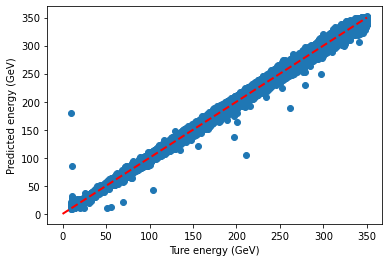

In [30]:
plt.scatter(y_test_np.flatten(), y_pred_np.flatten())
x= np.linspace(0, 350, 10000)
y=x
plt.plot(x, y, color = 'r', ls = '--', lw = 2.0)
plt.xlabel('Ture energy (GeV)')
plt.ylabel('Predicted energy (GeV)')
plt.savefig('regression_BDT.jpg')

In [22]:
def truncated_gaussian(x, mu, sigma, a, b):
    # a and b are bounds in standard normal units
    a_scaled = (a - mu) / sigma
    b_scaled = (b - mu) / sigma
    return truncnorm.pdf(x, a_scaled, b_scaled, loc=mu, scale=sigma)

In [23]:
# Histogram
counts, bin_edges = np.histogram(response, bins=1000, density=True)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# Fit
popt, _ = curve_fit(
    lambda x, mu, sigma: truncated_gaussian(x, mu, sigma, a=0.9, b=1.1),
    bin_centers, counts, p0=[1.0, 0.1]
)
mu_fit, sigma_fit = popt

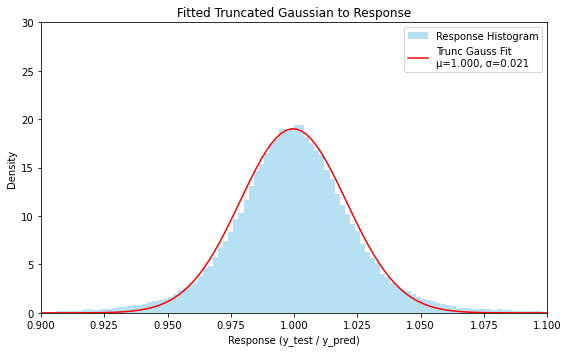

In [24]:
x_vals = np.linspace(0.9, 1.1, 100)
pdf_vals = truncated_gaussian(x_vals, mu_fit, sigma_fit, a=0.5, b=1.5)

plt.figure(figsize=(8, 5))
plt.hist(response, bins=100, density=True, color='skyblue', alpha=0.6, label='Response Histogram')
plt.plot(x_vals, pdf_vals, 'r-', label=f'Trunc Gauss Fit\nμ={mu_fit:.3f}, σ={sigma_fit:.3f}')
plt.xlabel('Response (y_test / y_pred)')
plt.xlim(0.9, 1.1)
plt.ylim(0, 30)
plt.ylabel('Density')
plt.title('Fitted Truncated Gaussian to Response')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# import seaborn as sns

# # Plot feature importance
# importance = xgb.feature_importances_
# # feature_importance = pd.DataFrame({
# #     'feature': X_train.columns,
# #     'importance': importance
# # }).sort_values('importance', ascending=False)


# # feature_names = [f'feature_{i}' for i in range(X_train.shape[1])]

# feature_importance = pd.DataFrame({
#     'feature': X_train.columns,
#     'importance': importance
# }).sort_values('importance', ascending=False)

# # plt.figure(figsize=(10, 6))
# plt.figure(figsize=(10, 12))  # taller figure

# sns.barplot(x='importance', y='feature', data=feature_importance)
# plt.title('Feature Importance')
# plt.tight_layout() 
# plt.show()

In [ ]:
# Get importance as a dictionary: {feature_name: importance_score}
importance_dict = bst.get_score(importance_type='weight')  # or 'gain', 'cover', etc.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm
from scipy.optimize import curve_fit

# Truncated Gaussian PDF
def truncated_gaussian(x, mu, sigma, a=0.9, b=1.1):
    a_, b_ = (a - mu) / sigma, (b - mu) / sigma
    return truncnorm.pdf(x, a_, b_, loc=mu, scale=sigma)

# Fit wrapper
def fit_func(x, mu, sigma):
    return truncated_gaussian(x, mu, sigma)

# Step 1: Prepare data
y_test_np = y_test.values if hasattr(y_test, 'values') else y_test
y_pred_np = y_pred
y_test_np = y_test_np.flatten()
y_pred_np = y_pred_np.flatten()

# Step 2: Binning based on y_test
bin_edges = np.arange(0, y_test_np.max() + 10, 10)
bin_indices = np.digitize(y_test_np, bin_edges)

# Step 3: Containers
response_bins = []
bin_centers = []
mu_vals, sigma_vals, mu_errs, sigma_errs = [], [], [], []
epsilon = 1e-8

# Step 4: Fit truncated Gaussian per bin
for i in range(1, len(bin_edges)):
    indices = np.where(bin_indices == i)[0]
    if len(indices) < 10:
        continue

    y_test_bin = y_test_np[indices]
    y_pred_bin = y_pred_np[indices]
    response = y_test_bin / (y_pred_bin + epsilon)
    response_bins.append(response)
    center = (bin_edges[i - 1] + bin_edges[i]) / 2
    bin_centers.append(center)

    hist_vals, bin_edges_hist = np.histogram(response, bins=50, range=(0.9, 1.1), density=True)
    bin_centers_hist = 0.5 * (bin_edges_hist[1:] + bin_edges_hist[:-1])
    mu_guess = np.mean(response)
    sigma_guess = np.std(response)

    try:
        popt, pcov = curve_fit(fit_func, bin_centers_hist, hist_vals, p0=[mu_guess, sigma_guess])
        mu_fit, sigma_fit = popt
        mu_vals.append(mu_fit)
        sigma_vals.append(sigma_fit)
        mu_errs.append(np.sqrt(pcov[0, 0]))
        sigma_errs.append(np.sqrt(pcov[1, 1]))
    except Exception as e:
        print(f"Fit failed for bin {i}: {e}")
        continue

# Step 5: Plot all fits with tight layout
n_plots = len(response_bins)
n_cols = 4
n_rows = int(np.ceil(n_plots / n_cols))

fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axs = axs.flatten() if n_plots > 1 else [axs]

for plot_idx in range(n_plots):
    ax = axs[plot_idx]
    response = response_bins[plot_idx]
    center = bin_centers[plot_idx]
    mu_fit = mu_vals[plot_idx]
    sigma_fit = sigma_vals[plot_idx]

    hist_vals, bin_edges_hist = np.histogram(response, bins=50, range=(0.9, 1.1), density=True)
    bin_centers_hist = 0.5 * (bin_edges_hist[1:] + bin_edges_hist[:-1])
    x_fit = np.linspace(0.9, 1.1, 200)

    ax.hist(response, bins=50, range=(0.9, 1.1), density=True, alpha=0.6, color='skyblue', label='Response')
    ax.plot(x_fit, truncated_gaussian(x_fit, mu_fit, sigma_fit), 'r-', lw=2, label='Trunc. Gaussian Fit')
    ax.set_title(f'Bin Center: {center:.0f} GeV')
    ax.set_xlabel("Response (y_test / y_pred)")
    ax.set_ylabel("Density")
    ax.text(0.91, np.max(hist_vals) * 0.8, f"$\\mu$ = {mu_fit:.4f}\n$\\sigma$ = {sigma_fit:.4f}", fontsize=10)
    ax.legend(fontsize=9)

# Hide unused subplots
for j in range(n_plots, len(axs)):
    axs[j].axis("off")

plt.tight_layout()
plt.show()

# Step 6: Summary plots

# Convert lists to arrays
mu_vals = np.array(mu_vals)
sigma_vals = np.array(sigma_vals)
mu_errs = np.array(mu_errs)
sigma_errs = np.array(sigma_errs)
bin_centers = np.array(bin_centers)

# Calculate σ/μ and its uncertainty
sigma_over_mu = sigma_vals / mu_vals
sigma_over_mu_err = sigma_over_mu * np.sqrt((sigma_errs / sigma_vals)**2 + (mu_errs / mu_vals)**2)

# Plot σ/μ
plt.errorbar(bin_centers, sigma_over_mu, yerr=sigma_over_mu_err, fmt='o-', capsize=5)
plt.xlabel("True Energy [GeV]")
plt.ylabel("σ / μ")
plt.title("Relative Resolution vs True Energy")
plt.grid(True)
plt.show()

# Plot μ
plt.errorbar(bin_centers, mu_vals, yerr=mu_errs, fmt='o-', capsize=5)
plt.xlabel("True Energy [GeV]")
plt.ylabel("Mean Response (μ)")
plt.title("Mean Response vs True Energy")
plt.grid(True)
plt.show()



In [ ]:
# Define fit function: sqrt( (S/sqrt(E))^2 + C^2 )
def resolution_model(E, S, C):
    return np.sqrt((S / np.sqrt(E))**2 + C**2)

# Initial guess: S = 0.3, C = 0.01
popt, pcov = curve_fit(resolution_model, bin_centers, sigma_over_mu,
                       sigma=sigma_over_mu_err, p0=[0.3, 0.01], absolute_sigma=True)

S_fit, C_fit = popt
S_err, C_err = np.sqrt(np.diag(pcov))

# Print results
print(f"Stochastic term (S): {S_fit:.4f} ± {S_err:.4f}")
print(f"Constant term (C):   {C_fit:.4f} ± {C_err:.4f}")

# Plot the fit over the data
E_plot = np.linspace(min(bin_centers), max(bin_centers), 300)
fit_curve = resolution_model(E_plot, S_fit, C_fit)

plt.errorbar(bin_centers, sigma_over_mu, yerr=sigma_over_mu_err, fmt='o', capsize=5, label='Data')
plt.plot(E_plot, fit_curve, 'r--', label=f'Fit: $\\sqrt{{(S/\\sqrt{{E}})^2 + C^2}}$\nS = {S_fit:.4f} ± {S_err:.4f}\nC = {C_fit:.4f} ± {C_err:.4f}')
plt.xlabel("True Energy [GeV]")
plt.ylabel("σ / μ")
plt.title("Fit of σ/μ with Stochastic and Constant Term")
plt.grid(True)
plt.legend()
plt.savefig('S_C_term_BDT.png')
plt.show()